# Homework 7, Part Two: A dataset about dogs.

Data from [a FOIL request to New York City](https://www.muckrock.com/foi/new-york-city-17/pet-licensing-data-for-new-york-city-23826/).

Some of the questions get kind of weird in this one, especially later on. **Feel free to lean on ChatGPT for the crazier ones!** It might be an interesting exploration of how to ask problems or explain what your dataset looks like.

## Do your importing and your setup

In [274]:
import pandas as pd

## Read in the file `NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx` and look at the first five rows

In [275]:
df = pd.read_excel("NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx")
df.head()

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date
0,10024,BLUE MACK,M,Unknown,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,NaN,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12
3,10025,Buddy,M,Unknown,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,NaN,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12


## How many rows do you have in the data? What are the column types?

If there are more than 30,000 rows in your dataset, go back and only read in the first 30,000.

In [276]:
df.shape

(81937, 15)

#### There are 81937 rows in the data.

In [277]:
df = pd.read_excel('NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx', nrows=30000)

In [278]:
df.dtypes

Owner Zip Code                     int64
Animal Name                       object
Animal Gender                     object
Primary Breed                     object
Secondary Breed                   object
Animal Dominant Color             object
Animal Secondary Color            object
Animal Third Color                object
Animal Birth              datetime64[ns]
Spayed or Neut                    object
Guard or Trained                  object
Vaccinated                        object
Application Date          datetime64[ns]
License Issued Date       datetime64[ns]
License Expired Date      datetime64[ns]
dtype: object

## Describe the dataset in words. What is each row? List two column titles along with what each of those columns means.

For example: “Each row is an animal in the zoo. `is_reptile` is whether the animal is a reptile or not”

#### Each row in this dataset represents a licensed animal (likely a pet) in New York City.
#### "Spayed or Neut": Indicates whether the animal has been spayed or neutered (e.g., "Yes" or "No").
#### "Secondary Breed": Represents the secondary breed or mix of the animal (if applicable). If the animal is purebred or the secondary breed is unknown, this value might be NaN.

# Your thoughts

Think of three questions you could ask this dataset. **Don't ask them**, just write them down in the cell below. Feel free to use either Markdown or Python comments.

#### 1. What are the animals that have all dominant color, secondary color and third color?
#### 2. Which gender of the animal have a higher percentage of Guard or Trained?
#### 3. How many animals already have their license expired?

# Looking at some dogs

## What are the most popular (primary) breeds of dogs? Graph the top 10.

In [279]:
df['Primary Breed'].value_counts().head(10)

Primary Breed
Unknown                                 4777
Yorkshire Terrier                       1882
Shih Tzu                                1760
Chihuahua                               1535
Maltese                                 1133
Labrador Retriever                      1074
American Pit Bull Terrier/Pit Bull       780
Labrador Retriever Crossbreed            738
American Pit Bull Mix / Pit Bull Mix     722
Jack Russell Terrier                     553
Name: count, dtype: int64

#### The 10 most popular (primary) breeds of dogs are Unknown, Yorkshire Terrier, Shih Tzu, Chihuahua, Maltese, Labrador Retriever, American Pit Bull Terrier/Pit Bull, Labrador Retriever Crossbreed, American Pit Bull Mix / Pit Bull Mix and Jack Russell Terrier.

## "Unknown" is a terrible breed! Graph the top 10 breeds that are NOT Unknown

In [280]:
# Replace 'Unknown' with NaN
df['Primary Breed'] = df['Primary Breed'].replace('Unknown', pd.NA, regex=True)

# Exclude NaN values and get the top 10 breeds
df['Primary Breed'].dropna().value_counts().head(10)

Primary Breed
Yorkshire Terrier                       1882
Shih Tzu                                1760
Chihuahua                               1535
Maltese                                 1133
Labrador Retriever                      1074
American Pit Bull Terrier/Pit Bull       780
Labrador Retriever Crossbreed            738
American Pit Bull Mix / Pit Bull Mix     722
Jack Russell Terrier                     553
Beagle                                   546
Name: count, dtype: int64

#### The top 10 breeds that are Yorkshire Terrier, Shih Tzu, Chihuahua, Maltese, Labrador Retriever, American Pit Bull Terrier/Pit Bull, American Pit Bull Mix / Pit Bull Mix, Labrador Retriever Crossbreed, Beagle.

## What are the most popular dog names?

In [281]:
df['Animal Name'] = df['Animal Name'].replace(
    r'(?i)^(unknow|unknowed|unknown|unknwn|unknwon|unkown|unkwwn|unname)$', 
    pd.NA, 
    regex=True
)
df['Animal Name'].dropna().value_counts().head(10)

Animal Name
Max        202
Bella      193
Charlie    172
Lola       146
Rocky      140
Lucy       128
Coco       114
Buddy      113
Lucky      106
Daisy       90
Name: count, dtype: int64

#### The top 10 most popular dog names are Max, Bella, Charlie, Lola, Rocky, Lucy, Coco, Buddy, Lucky and Daisy.

## Do any dogs have your name? How many dogs are named "Max," and how many are named "Maxwell"?

In [282]:
df[df['Animal Name'] == 'Yushuo'].shape[0] # shape[0] returns the number of rows in the dataframe

0

#### None of the dogs have my name. 

In [283]:
df[df['Animal Name'] == 'Max'].shape[0]

202

#### 202 dogs are named "Max".

In [284]:
df[df['Animal Name'] == 'Maxwell'].shape[0]

11

#### 11 dogs are named "Maxwell".

## What percentage of dogs are guard dogs?

Check out the documentation for [value counts](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html).

In [285]:
df['Guard or Trained'].value_counts(dropna=False, normalize=True)

Guard or Trained
No     0.660300
NaN    0.339133
Yes    0.000567
Name: proportion, dtype: float64

#### 0.0567% of dogs are guard dogs.

## What are the actual numbers?

In [286]:
df['Guard or Trained'].value_counts(dropna=False)

Guard or Trained
No     19809
NaN    10174
Yes       17
Name: count, dtype: int64

#### 17 dogs are guard dogs.

## Wait... if you add that up, is it the same as your number of rows? Where are the other dogs???? How can we find them??????

Use your `.head()` to think about it, then you'll do some magic with `.value_counts()`

#### I recognized that there are missing values in the Guard or Trained column so it is the same as my number of rows when adding up. 

## Fill in all of those empty "Guard or Trained" columns with "No"

**We're maing a big assumption** here that if they aren't listed as guard dogs, they probably aren't guard dogs.

Look up `.fillna`. Check your result with another `.value_counts()`

In [287]:
df['Guard or Trained'] = df['Guard or Trained'].fillna('No')
df['Guard or Trained'].value_counts(dropna=False)

Guard or Trained
No     29983
Yes       17
Name: count, dtype: int64

## What are the top dog breeds for guard dogs? 

In [288]:
df[df['Guard or Trained']== 'Yes']['Primary Breed'].value_counts().head(10)

Primary Breed
German Shepherd Dog           3
Poodle, Standard              1
German Shepherd Crossbreed    1
Labrador Retriever            1
Doberman Pinscher             1
Shih Tzu                      1
Rottweiler                    1
Golden Retriever              1
Schnauzer, Miniature          1
Yorkshire Terrier             1
Name: count, dtype: int64

#### The most top dog breed for guard dogs is the German Shepherd Dog. 

## Create a new column called "year" that is the dog's year of birth

The `Animal Birth` column is a datetime, so you can get the year out of it with `df['Animal Birth'].dt.year` or `df['Animal Birth'].apply(lambda birth: birth.year)`.

In [289]:
# The Animal Birth column is a datetime
df['year']=df['Animal Birth'].dt.year
df['year']

0        2007
1        2013
2        2014
3        2008
4        2014
         ... 
29995    2010
29996    2010
29997    2014
29998    2009
29999    2012
Name: year, Length: 30000, dtype: int32

## Calculate a new column called “age” that shows approximately how old the dog is. How old are dogs on average?

In [290]:
df['age']= 2024 - df['year']
df['age']

0        17
1        11
2        10
3        16
4        10
         ..
29995    14
29996    14
29997    10
29998    15
29999    12
Name: age, Length: 30000, dtype: int32

In [291]:
df['age'].mean().round(2)

np.float64(14.71)

#### On average, dogs are 14.71 years old. 

# Joining data together

## Which neighborhood does each dog live in?

You also have a (terrible) list of NYC neighborhoods in `zipcodes-neighborhoods.csv`. Join these two datasets together, so we know what neighborhood each dog lives in. **Be sure to not read it in as `df`, or else you'll overwrite your dogs dataframe.**

Here's an example of how you can merge two dataframes:

```python
merged = prisons_df.merge(states_df, left_on='state', right_on='name')
```

In the example above, `prisons_df` has a column called `state` that matches with the `name` column of `states_df`. The columns of `states_df` are then added to `prisons_df` and returned as a new dataframe called `merged`.

> **Rows without a match get discarded because it is an [inner join](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html).** I think left joins are probably the most common (keep rows from the "left" df even if they don't have a match in the right. For example, by default a prison with the state of `PUERTO RICO` would be dropped if PR wasn't in `states_df`, but if you changed it to `how='left'` it would be preserved, but the additional columns would just be `NaN`.

In [292]:
df_neighborhood = pd.read_csv("zipcodes-neighborhoods.csv")
merged = df.merge(df_neighborhood, left_on='Owner Zip Code', right_on='zip', how='left')
merged

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,year,age,neighborhood,zip,borough
0,10024,BLUE MACK,M,<NA>,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007,17,Upper West Side,10024.0,Manhattan
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20,2013,11,Southeast Bronx,10461.0,Bronx
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,No,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12,2014,10,Greenwich Village and Soho,10013.0,Manhattan
3,10025,Buddy,M,<NA>,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20,2008,16,Upper West Side,10025.0,Manhattan
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,No,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12,2014,10,Greenwich Village and Soho,10013.0,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,11372,Bella,F,<NA>,Goldendoodle,CREAM,WHITE,TAN,2010-07-01,Yes,No,Yes,2015-08-22 19:00:39.303,2015-08-22,2016-09-27,2010,14,West Queens,11372.0,Queens
29996,11417,Sadie,F,"Schnauzer, Miniature",NaN,BLACK,BROWN,NaN,2010-05-01,Yes,No,Yes,2015-08-22 19:03:08.003,2015-08-22,2016-09-28,2010,14,Southwest Queens,11417.0,Queens
29997,11228,<NA>,M,Pomeranian,NaN,Tan,White,NaN,2014-03-01,Yes,No,Yes,2015-08-22 19:04:56.720,2015-08-22,2016-08-22,2014,10,Southwest Brooklyn,11228.0,Brooklyn
29998,11217,daisy,F,<NA>,NaN,GRAY,WHITE,BLACK,2009-01-01,Yes,No,Yes,2015-08-22 19:14:30.177,2015-08-22,2016-08-05,2009,15,Northwest Brooklyn,11217.0,Brooklyn


## What is the most popular dog name in all parts of the Bronx? How about Brooklyn? The Upper East Side?

In [293]:
merged[merged['borough'] == 'Bronx']['Animal Name'].value_counts().head(1)

Animal Name
Bella    22
Name: count, dtype: int64

#### Bella is the most popular dog name in all parts of the Bronx. 

In [294]:
merged[merged['borough'] == 'Brooklyn']['Animal Name'].value_counts().head(1)

Animal Name
Max    46
Name: count, dtype: int64

#### Max is the most popular dog name in all parts of the Brooklyn. 

In [295]:
merged[merged['neighborhood'] == 'Upper East Side']['Animal Name'].value_counts().head(1)

Animal Name
Charlie    19
Name: count, dtype: int64

#### Charlie is the most popular dog name in all parts of the the Upper East Side.

## What is the most common dog breed in each of the neighborhoods of NYC?

In [296]:
merged.groupby('neighborhood')['Primary Breed'].agg(lambda x: x.value_counts().idxmax())

neighborhood
Borough Park                                        Yorkshire Terrier
Bronx Park and Fordham                              Yorkshire Terrier
Bushwick and Williamsburg                           Yorkshire Terrier
Canarsie and Flatlands                                       Shih Tzu
Central Bronx                                       Yorkshire Terrier
Central Brooklyn                                             Shih Tzu
Central Harlem                                              Chihuahua
Central Queens                                      Yorkshire Terrier
Chelsea and Clinton                                         Chihuahua
East Harlem                                         Yorkshire Terrier
East New York and New Lots                          Yorkshire Terrier
Flatbush                                                     Shih Tzu
Gramercy Park and Murray Hill                       Yorkshire Terrier
Greenpoint                                                  Chihuahua
Greenwi

## Make a new column called monochrome that is True for any animal that only has black, white or grey as one of its colors. How many animals are monochrome?

Be conscious of case-sensitivity! `WHITE` and `white` aren't the same, so you might need to standardize first.

Using `.isin` is going to be very helpful.

In [297]:
# Standardize the color columns to lowercase for case-insensitivity
merged['Animal Dominant Color'] = merged['Animal Dominant Color'].str.lower().replace('NULL', pd.NA)
merged['Animal Secondary Color'] = merged['Animal Secondary Color'].str.lower()
merged['Animal Third Color'] = merged['Animal Third Color'].str.lower()

# Define monochrome colors
monochrome_colors = {'black', 'white', 'grey'}

# Check if the animal has only one color of the three color levels, and that color is monochrome
merged['monochrome'] = (
    (
        merged['Animal Dominant Color'].isin(monochrome_colors) &
        merged['Animal Secondary Color'].isna() & # Ensure the other two color columns are NaN
        merged['Animal Third Color'].isna() # Ensure the other two color columns are NaN
    ) | (
        merged['Animal Secondary Color'].isin(monochrome_colors) &
        merged['Animal Dominant Color'].isna() &
        merged['Animal Third Color'].isna()
    ) | (
        merged['Animal Third Color'].isin(monochrome_colors) &
        merged['Animal Dominant Color'].isna() &
        merged['Animal Secondary Color'].isna()
    )
)

# Count the number of monochrome animals
monochrome_count = merged['monochrome'].sum()
monochrome_count

np.int64(3945)

#### 3945 animals are monochrome.

## How many dogs are in each borough? Plot it in a graph.

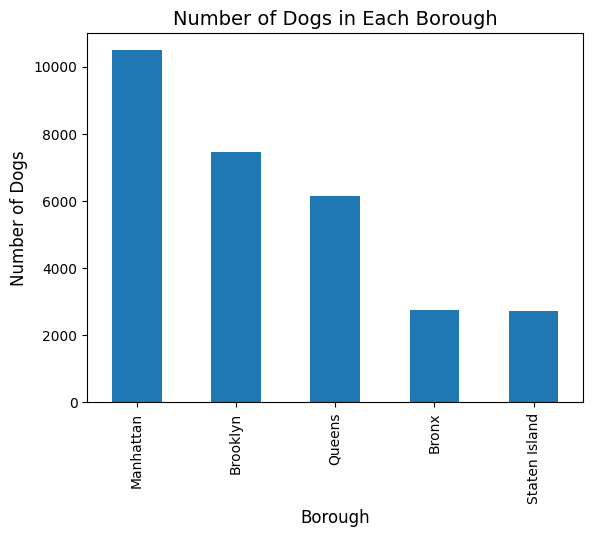

In [298]:
import matplotlib.pyplot as plt
merged['borough'].value_counts().plot(kind='bar')

# Add labels and title
plt.title('Number of Dogs in Each Borough', fontsize=14)
plt.xlabel('Borough', fontsize=12)
plt.ylabel('Number of Dogs', fontsize=12)

# Display the plot
plt.show()

In [299]:
merged['borough'].value_counts()

borough
Manhattan        10478
Brooklyn          7466
Queens            6154
Bronx             2748
Staten Island     2727
Name: count, dtype: int64

## Which borough has the highest number of dogs per-capita?

You’ll need to merge in `population_boro.csv`

In [300]:
df_boro = pd.read_csv("boro_population.csv")
merged_all = merged.merge(df_boro, left_on='borough', right_on='borough', how='left')
merged_all

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,...,License Issued Date,License Expired Date,year,age,neighborhood,zip,borough,monochrome,population,area_sqmi
0,10024,BLUE MACK,M,<NA>,AIREDALE TERR,brown,black,NaN,2007-11-01,Yes,...,2015-09-19,2016-09-19,2007,17,Upper West Side,10024.0,Manhattan,False,1644518.0,23.0
1,10461,Indie Zephir,M,Rottweiler,NaN,black,tan,NaN,2013-04-01,No,...,2014-09-20,2018-09-20,2013,11,Southeast Bronx,10461.0,Bronx,False,1455444.0,42.0
2,10013,Bilal,M,Australian Cattledog,NaN,rust,NaN,NaN,2014-09-01,Yes,...,2014-09-12,2019-09-12,2014,10,Greenwich Village and Soho,10013.0,Manhattan,False,1644518.0,23.0
3,10025,Buddy,M,<NA>,Cockapoo,blond,white,NaN,2008-04-01,Yes,...,2014-09-12,2017-10-20,2008,16,Upper West Side,10025.0,Manhattan,False,1644518.0,23.0
4,10013,Ali,M,Basenji,NaN,black,NaN,NaN,2014-01-01,No,...,2014-09-12,2019-09-12,2014,10,Greenwich Village and Soho,10013.0,Manhattan,True,1644518.0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,11372,Bella,F,<NA>,Goldendoodle,cream,white,tan,2010-07-01,Yes,...,2015-08-22,2016-09-27,2010,14,West Queens,11372.0,Queens,False,2339150.0,109.0
29996,11417,Sadie,F,"Schnauzer, Miniature",NaN,black,brown,NaN,2010-05-01,Yes,...,2015-08-22,2016-09-28,2010,14,Southwest Queens,11417.0,Queens,False,2339150.0,109.0
29997,11228,<NA>,M,Pomeranian,NaN,tan,white,NaN,2014-03-01,Yes,...,2015-08-22,2016-08-22,2014,10,Southwest Brooklyn,11228.0,Brooklyn,False,2636735.0,71.0
29998,11217,daisy,F,<NA>,NaN,gray,white,black,2009-01-01,Yes,...,2015-08-22,2016-08-05,2009,15,Northwest Brooklyn,11217.0,Brooklyn,False,2636735.0,71.0


In [301]:
merged_all['dog_count'] = merged_all['borough'].map(merged_all['borough'].value_counts())
merged_all['dogs_per_capita'] = merged_all['dog_count'] / merged_all['population']

dogs_per_capita_by_borough = merged_all.groupby('borough')['dogs_per_capita'].mean()

sorted_dogs_per_capita = dogs_per_capita_by_borough.sort_values(ascending=False)
sorted_dogs_per_capita

borough
Manhattan        0.006371
Staten Island    0.005746
Brooklyn         0.002832
Queens           0.002631
Bronx            0.001888
Name: dogs_per_capita, dtype: float64

#### Manhattan has the highest number of dogs per-capita. 

## Make a bar graph of the top 5 breeds in each borough.

How do you groupby and then only take the top X number? This is very crazy, so ask in Slack, or a TA, or our buddy ChatGPT.

/var/folders/ht/lsndydln7jl_5ttkmj9tcl7c0000gn/T/ipykernel_87959/1654043974.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_5_breeds = top_breeds.groupby('borough').apply(


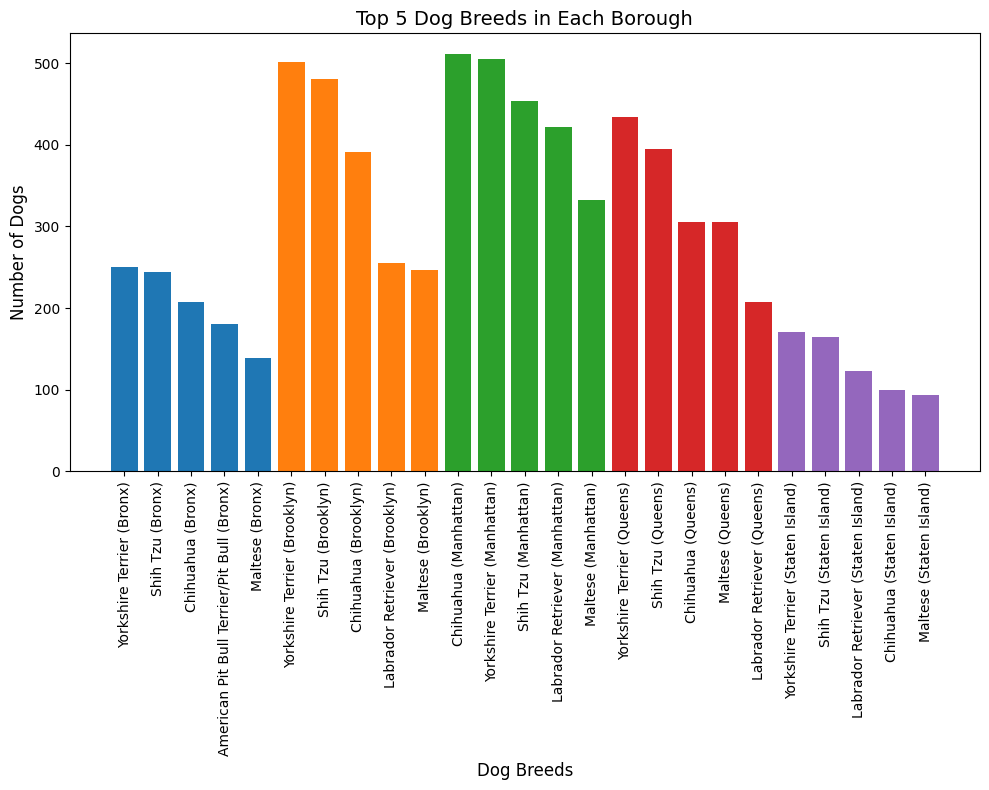

In [302]:
# Group by Borough and Primary Breed, then count occurrences
top_breeds = merged.groupby(['borough', 'Primary Breed']).size().reset_index(name='count')
# .size() counts the number of rows (occurrences) in each group
# After grouping and counting, the result is a pandas Series. To convert it back into a DataFrame:
# .reset_index() creates a new DataFrame from the grouped data, with the group keys (borough and Primary Breed) becoming columns.
# name='count' specifies that the column containing the counts should be named "count".

# Get the top 5 breeds per borough
top_5_breeds = top_breeds.groupby('borough').apply(
    lambda x: x.nlargest(5, 'count')
).reset_index(drop=True)
# the lambda function takes each group (x) and retrieves the top 5 rows based on the count column using nlargest(5, 'count')

# Plotting the top 5 breeds for each borough
fig, ax = plt.subplots(figsize=(10, 8))
for borough in top_5_breeds['borough'].unique():
    data = top_5_breeds[top_5_breeds['borough'] == borough]
    ax.bar(data['Primary Breed'] + " (" + borough + ")", data['count'], label=borough)

plt.title('Top 5 Dog Breeds in Each Borough', fontsize=14)
plt.xlabel('Dog Breeds', fontsize=12)
plt.xticks(rotation=90)
plt.ylabel('Number of Dogs', fontsize=12)
plt.tight_layout()
plt.show()